# Check consistency of section titles

In [45]:
import os
import re
import glob
def get_markdown_sections(file_path):
    """
    Extracts markdown sections from a file.

    Parameters
    ----------
    file_path : str
        Path to the markdown file.

    Returns
    -------
    list
        A list of sections from the markdown file.

    """
    sections = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('##'):
                line = re.sub(r'\[.*?\]', '', line).strip()
                sections.append(line)
    return sections

def get_worker_markdown(exclude_files=[]):
    """
    Traverses directories to gather markdown files and their sections.

    Parameters
    ----------
    exclude_files : list, optional
        A list of files to be excluded from the search.

    Returns
    -------
    dict
        A dictionary where keys are the paths to the markdown files 
        and values are the list of sections in each file.

    """
    worker_files = {}
    directories = glob.glob("./*/")
    for directory in directories:
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith(".md") and file not in exclude_files:
                    file_path = os.path.join(root, file)
                    worker_files[file_path] = get_markdown_sections(file_path)
    return worker_files

def markdown_files_compliance(main_file, exclude_files=[]):
    """
    Checks compliance of sections between markdown files.

    Parameters
    ----------
    main_file : str
        Path to the main markdown file.
    exclude_files : list, optional
        A list of markdown files to be excluded from the search.

    """
    worker_files = get_worker_markdown(exclude_files)
    main_sections = get_markdown_sections(main_file)
    missing_sec_list=[]
    unref_sec_list=[]

    
    for worker_file, worker_sections in worker_files.items():
        for section in worker_sections:
            if section not in main_sections:
                print(f"Missing section in {main_file}: {worker_file}, Section: {section}")
                missing_sec_list.append(section)

    for section in main_sections:
        if not any(section in sections for sections in worker_files.values()):
            print(f"Unreferred section {main_file}: {section}")
            unref_sec_list.append(section)

    return missing_sec_list, unref_sec_list


In [46]:
missing_sec_list,unref_sec_list=markdown_files_compliance('Prompt_Template.md', ['2111.01152_Bard.md',])

Missing section in Prompt_Template.md: ./1812.04213/1812.04213.md, Section: ## Construct noninteracting Hamiltonian (continuum version)
Missing section in Prompt_Template.md: ./1812.04213/1812.04213.md, Section: ## Define each term in noninteracting Hamiltonian (continuum version)
Missing section in Prompt_Template.md: ./2108.02159/2108.02159.md, Section: ## Relabel the index in Hartree term
Missing section in Prompt_Template.md: ./2108.02159/2108.02159.md, Section: ## Relabel the index in Fock term
Missing section in Prompt_Template.md: ./2111.01152/2111.01152.md, Section: ## Convert from single-particle to second-quantized form, return in the matrix
Unreferred section Prompt_Template.md: ## lattice, second-quantized, Hartree
Unreferred section Prompt_Template.md: ## lattice, second-quantized, Fock
Unreferred section Prompt_Template.md: ## lattice, second-quantized, Hartree-Fock
Unreferred section Prompt_Template.md: ## continuum, first-quantized, Hartree
Unreferred section Prompt_Tem

In [38]:
missing_sec_list

['## Relabel the index in Hartree term', '## Relabel the index in Fock term']

# Check tags

In [111]:
import pandas as pd
import numpy as np

In [61]:
import matplotlib.pyplot as plt


In [97]:
df=pd.read_csv('Hartree Fock.csv')

In [98]:
df['Manual Tags'].iloc[0].split('; ')

['electron',
 'fermion systems',
 'hartree and fock terms',
 'lattice model',
 'momentum space',
 'normal order']

In [99]:
categories = {
    'Kinetic term': ['continuum model', 'lattice model'],
    'Mean field working space': ['momentum space', 'real space'],
    "Wick's theorem": ['normal order', 'superconducting order', 'normal and superconducting order'],
    'Normal order parameter': ['hartree term', 'fock term', 'hartree and fock terms'],
    'Particle statistics': ['fermion systems', 'bosonic systems'],
    'Quasiparticle type': ['electron', 'Parton', 'Slave boson']
}

In [100]:
term_list=[]
category_list=[]
for category, terms in categories.items():
    for term in terms:
        term_list.append(term)
        category_list.append(category)
tags_df=pd.DataFrame({'category':category_list,'count':0},index=term_list,)

In [102]:
tags_df

,category,count
continuum model,Kinetic term,0
lattice model,Kinetic term,0
momentum space,Mean field working space,0
real space,Mean field working space,0
normal order,Wick's theorem,0
superconducting order,Wick's theorem,0
normal and superconducting order,Wick's theorem,0
hartree term,Normal order parameter,0
fock term,Normal order parameter,0
hartree and fock terms,Normal order parameter,0


In [113]:
(row['Manual Tags'])

'electron; fermion systems; hartree and fock terms; lattice model; momentum space; normal order'

In [114]:
for idx,row in df.iterrows():
    try:
        tag_list= row['Manual Tags'].split('; ')
    except:
        tag_list =[]

    for term in tag_list:
        tags_df.loc[term,'count']+=1

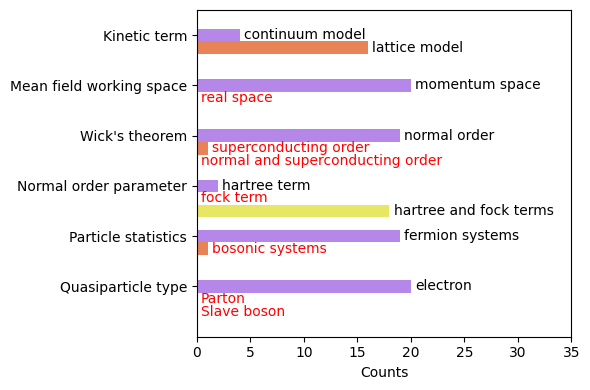

In [164]:
fig,ax=plt.subplots(figsize=(6,4),tight_layout=True)
width=0.25
color_list=['#B587E8','#E88358','#E8E764','#6EFFA8','#72F566']
for group_idx, (category, terms) in enumerate(categories.items()):
    for term_idx, (term,color) in enumerate(zip(terms,color_list)):
        y_pos=group_idx+width*term_idx
        rect=ax.barh(y_pos,tags_df.loc[term,'count'],width,color=color)
        textcolor='r' if tags_df.loc[term,'count']<=1 else 'k'
        ax.bar_label(rect,padding=3,labels=[term],color=textcolor)
ax.set_ylim(len(categories),-.5)
ax.set_xlim([0,35])
ax.set_xlabel('Counts')
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories.keys())

fig.savefig('tag_stat.png')

In [3]:
for x1 in ['continuum', 'lattice']:
    for x2 in ['first-quantized', 'second-quantized']:
        for x3 in ['hartree', 'fock', 'hartree-fock']:
            print(f'## {x1}, {x2}, {x3}')
            print(f'### Preamble\n')
            print(f'### Hamiltonian construction\n')
            print(f'### Mean-field theory\n')
            print(f'### Simplify the MF quadratic term\n')

## continuum, first-quantized, hartree
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## continuum, first-quantized, fock
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## continuum, first-quantized, hartree-fock
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## continuum, second-quantized, hartree
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## continuum, second-quantized, fock
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## continuum, second-quantized, hartree-fock
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

## lattice, first-quantized, hartree
### Preamble

### Hamiltonian construction

### Mean-field theory

### Simplify the MF quadratic term

#

In [5]:
for i in range(1,10):
    print(f'e{i}-->e{i+1}')

e1-->e2
e2-->e3
e3-->e4
e4-->e5
e5-->e6
e6-->e7
e7-->e8
e8-->e9
e9-->e10


# Plot a cube

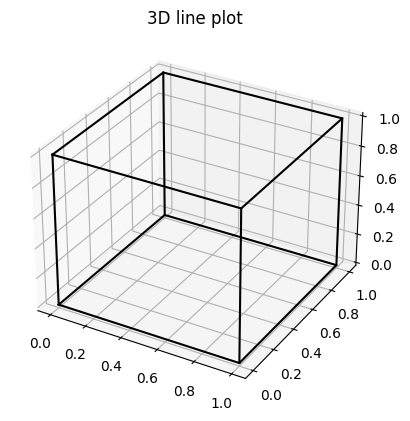

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining all 3 axis

import numpy as np

cube_z0 = np.array([
    [0, 0, 0], # start at the origin
    [1, 0, 0], # go to x=1
    [1, 1, 0], # go to y=1
    [0, 1, 0], # go to x=0
    [0, 0, 0], # go to y=0
])
cube_z1 = np.array([
    [0, 0, 1], # start at the origin
    [1, 0, 1], # go to x=1
    [1, 1, 1], # go to y=1
    [0, 1, 1], # go to x=0
    [0, 0, 1], # go to y=0
])
cube_00=np.array([[0,0,0],[0,0,1]])
cube_01=np.array([[0,1,0],[0,1,1]])
cube_11=np.array([[1,1,0],[1,1,1]])
cube_10=np.array([[1,0,0],[1,0,1]])

color='k'


ax.plot3D(*cube_z0.T, color=color)
ax.plot3D(*cube_z1.T, color=color)
ax.plot3D(*cube_00.T, color=color)
ax.plot3D(*cube_01.T, color=color)
ax.plot3D(*cube_10.T, color=color)
ax.plot3D(*cube_11.T, color=color)
ax.set_title('3D line plot')
plt.show()


In [13]:
def plot_cube(shift,ax=None,color='k'):
    if ax is None:
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        
    cube_z0 = np.array([
    [0, 0, 0], # start at the origin
    [1, 0, 0], # go to x=1
    [1, 1, 0], # go to y=1
    [0, 1, 0], # go to x=0
    [0, 0, 0], # go to y=0
    ])
    cube_z1 = np.array([
        [0, 0, 1], # start at the origin
        [1, 0, 1], # go to x=1
        [1, 1, 1], # go to y=1
        [0, 1, 1], # go to x=0
        [0, 0, 1], # go to y=0
    ])
    cube_00=np.array([[0,0,0],[0,0,1]])
    cube_01=np.array([[0,1,0],[0,1,1]])
    cube_11=np.array([[1,1,0],[1,1,1]])
    cube_10=np.array([[1,0,0],[1,0,1]])
    ax.plot3D(*(cube_z0+shift).T, color=color)
    ax.plot3D(*(cube_z1+shift).T, color=color)
    ax.plot3D(*(cube_00+shift).T, color=color)
    ax.plot3D(*(cube_01+shift).T, color=color)
    ax.plot3D(*(cube_10+shift).T, color=color)
    ax.plot3D(*(cube_11+shift).T, color=color)
    


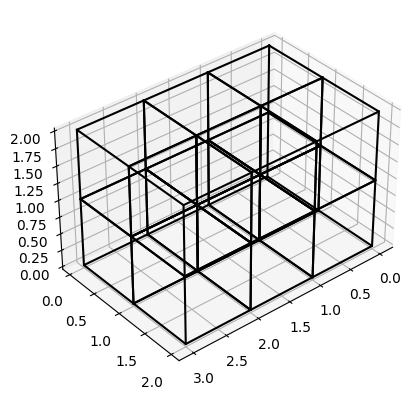

In [39]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
for i in [0,1,2]:
    for j in [0,1,]:
        for k in [0,1,]:
            plot_cube([i,j,k],color='k',ax=ax)


# ax.set_zlim(0,2)

ax.view_init(elev=35, azim=50, roll=0)
ax.set_aspect('equal')

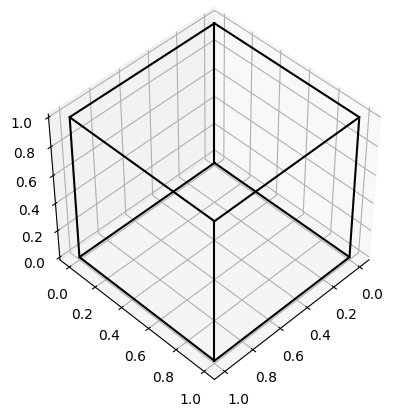

In [37]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
plot_cube([0,0,0],color='k',ax=ax)


# ax.set_zlim(0,2)

ax.view_init(elev=45, azim=45, roll=0)
ax.set_aspect('equal')

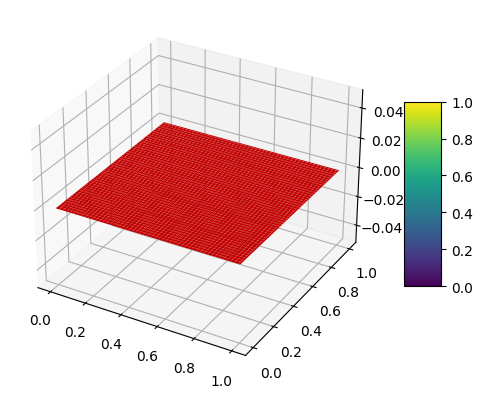

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the points on the (x, y) grid. We're creating a grid of points in the square [0,1]x[0,1]
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x, y = np.meshgrid(x, y)

# The z-coordinates are all zero, so this is just a flat surface at z=0.
z = np.zeros_like(x)

# Plot the surface. The color is determined by the height relative to the colormap
surf = ax.plot_surface(x, y, z, color='r',alpha=1)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
